# Mann-Kendall teste para séries temporais.

In [152]:
import pandas as pd
import pymannkendall as mk

# Carregar os dados do arquivo Excel
df = pd.read_excel('dados-chirps-ana/ana/ana-precipitação.xlsx')
df.head()

# Definir a primeira coluna como o índice (datas)
df = df.set_index('data')

# Converter os dados para números (caso estejam como strings)
df = df.apply(pd.to_numeric)

# Criar uma lista para armazenar os resultados
results = []

# Iterar sobre as colunas (municípios) e realizar o teste de Mann-Kendall
for col in df.columns:
    series_data = df[col]
    
    # Executar o teste de Mann-Kendall
    test_results = mk.original_test(series_data)
    
    # Armazenar os resultados em uma lista
    results.append({
        'Município': col,
        'Tendência': test_results.trend,
        'Estatística de teste': test_results.slope,
        'P-valor': test_results.p
    })

# Criar um DataFrame a partir dos resultados
df_results = pd.DataFrame(results)

# Salvar os resultados em um arquivo Excel
df_results.to_excel('resultados_mannkendall.xlsx', index=False)

# Curvatura de Sen para séries temporais (Sen's Slope test)

In [87]:
import pandas as pd
import numpy as np

# Carregar os dados do arquivo xlsx
df = pd.read_excel('dados-chirps-ana/ana/ana-precipitação.xlsx')

# Selecionar apenas as colunas com os dados meteorológicos (supondo que as colunas de data estejam nomeadas como 'data' no DataFrame)
dados_meteorologicos = df.drop('data', axis=1)  # Remove a coluna de datas

# Função para calcular o Sen's Slope
def sens_slope(x):
    n = len(x)
    slopes = []
    for i in range(n):
        for j in range(i + 1, n):
            slope = (x[j] - x[i]) / (j - i)
            slopes.append(slope)
    return np.nanmedian(slopes)

# Calcular o Sen's Slope para cada coluna de município
slopes = {}
for coluna in dados_meteorologicos.columns:
    slope = sens_slope(dados_meteorologicos[coluna].values)
    slopes[coluna] = slope

# Criar um DataFrame com os resultados
resultados = pd.DataFrame(slopes.items(), columns=['Município', "Sen's Slope"])

# Salvar os resultados em um arquivo xlsx
resultados.to_excel('resultados_sens_slope.xlsx', index=False)

# Mapa para visualizar o resultado da tendência. 

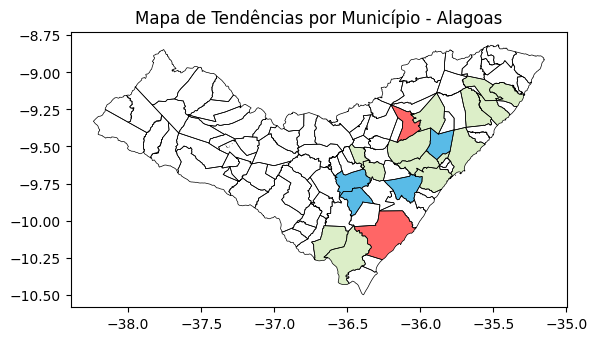

In [187]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o shapefile de Alagoas
alagoas = gpd.read_file('AL_Municipios_2022/AL_Municipios_2022.shp')

# Carregar os dados do arquivo xlsx
dados = pd.read_excel('resultados_mannkendall.xlsx')

# Mesclar os dados do shapefile com os dados da planilha
merged_data = alagoas.merge(dados, how='left', left_on='NM_MUN', right_on='Município')

# Mapear as novas tendências para as cores correspondentes
color_dict = {
    'no trend': '#DCEEC8',
    'increasing': '#59bbe7',
    'decreasing': '#FF6666'
}
merged_data['color'] = merged_data['Tendência'].map(color_dict)

# Preencher valores ausentes (NaN) com uma cor padrão
merged_data['color'].fillna('white', inplace=True)

# Plotar o mapa com bordas e preenchimento separados
fig, ax = plt.subplots(1, 1)

# Plotar o preenchimento das áreas (cores)
merged_data.plot(ax=ax, color=merged_data['color'], legend=False)

# Plotar as bordas dos municípios separadamente
merged_data.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Adicionar título
plt.title('Mapa de Tendências por Município - Alagoas')

# Exibir o mapa
plt.show()

# Recortando o mapa para a área de interesse

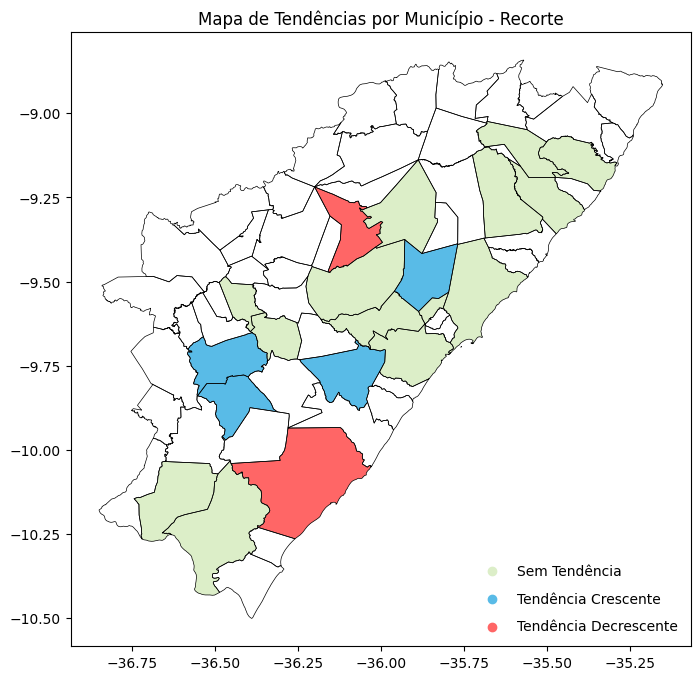

In [186]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o shapefile de Alagoas
alagoas = gpd.read_file('AL_Municipios_2022/AL_Municipios_2022.shp')

# Carregar os dados do arquivo xlsx
dados = pd.read_excel('resultados_mannkendall.xlsx')

# Mesclar os dados do shapefile com os dados da planilha
merged_data = alagoas.merge(dados, how='left', left_on='NM_MUN', right_on='Município')

# Mapear as novas tendências para as cores correspondentes
color_dict = {
    'no trend': '#DCEEC8',
    'increasing': '#59bbe7',
    'decreasing': '#FF6666'
}
merged_data['color'] = merged_data['Tendência'].map(color_dict)

# Preencher valores ausentes (NaN) com uma cor padrão
merged_data['color'].fillna('white', inplace=True)

# Definir limites da área de interesse (bounding box)
minx, miny, maxx, maxy = -36.67, -10.61, -34, -9  # Exemplo de coordenadas para o recorte

# Fazer o recorte da área de interesse
clipped_data = merged_data.cx[minx:maxx, miny:maxy]

# Plotar o mapa com bordas e preenchimento separados da área recortada
fig, ax = plt.subplots(figsize=(8, 8))
clipped_data.plot(ax=ax, color=clipped_data['color'], legend=False)
clipped_data.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Adicionar legenda manualmente
legend_labels = {
    'no trend': 'Sem Tendência',
    'increasing': 'Tendência Crescente',
    'decreasing': 'Tendência Decrescente'
}

for key, value in legend_labels.items():
    ax.scatter([], [], color=color_dict[key], label=value)

ax.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower right')

# Adicionar título
plt.title('Mapa de Tendências por Município - Recorte')

# Exibir o mapa
plt.show()